<h1>Imports</h1>

In [1]:
from pathlib import Path
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


import seaborn as sns
from IPython.display import display


In [2]:
pd.set_option("display.max_columns", 100)
%matplotlib inline

<h1>Dataset Importing</h1>

In [3]:
DATA_PATH = Path.cwd() / "../../datasets"

In [4]:
training_df = pd.read_csv(DATA_PATH / "train.csv", index_col="tripid")
training_df.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [5]:
training_df.columns

Index(['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare',
       'meter_waiting_till_pickup', 'pickup_time', 'drop_time', 'pick_lat',
       'pick_lon', 'drop_lat', 'drop_lon', 'fare', 'label'],
      dtype='object')

<h1>Data Preprocessing</h1>

In [6]:
training_df['pickup_time'] = pd.to_datetime(training_df['pickup_time'], format="%m/%d/%Y %H:%M")
training_df['drop_time'] = pd.to_datetime(training_df['drop_time'], format="%m/%d/%Y %H:%M")

In [7]:
training_df['label_marker']=(training_df['label']=='correct').astype(int)

<h1>Initial Data Analyisis</h1>

<h3>Weka analysis of outliers</h3>

In [8]:
weka_outliers = pd.read_csv(DATA_PATH / "train_outlier.csv", index_col="tripid")

In [9]:
print(weka_outliers[ (weka_outliers['Outlier'] == 'yes') & (weka_outliers['label']=='correct' ) ].index.tolist())

[189146174, 189176766, 189182800, 189227008, 189236485, 189259043, 189277797, 189284005, 189307311, 189323004, 189345964, 189363308, 189370252, 189372731, 189391717, 189394373, 189420181, 189428397, 189431382, 189445521, 189465650, 189475280, 189551186, 189572039, 189615129, 189623692, 189627696, 189640410, 189655834, 189667686, 189698072, 189738377, 189737409, 189748039, 189747601, 189752791, 189778822, 189801272, 189820422, 189820090, 189821179, 189824507, 189826263, 189829043, 189835514, 189841958, 189842329, 189877959, 189882220, 189884798, 189894385, 189925207, 189980243, 189978643, 189995541, 190007029, 190008226, 190009896, 190010618, 190023371, 190025934, 190042045, 190050433, 190050729, 190056653, 190059653, 190065135, 190070075, 190080854, 190108454, 190166142, 190173251, 190176497, 190184600, 190189374, 190207045, 190212978, 190218103, 190220877, 190222676, 190240764, 190242569, 190248159, 190256099, 190258689, 190284141, 190286692, 190240827, 190295160, 190294183, 190315565

<h2>Initial Feature Correlation</h2>

<b>HeatMap<b>

In [10]:
heatmap_initial = training_df.corr()

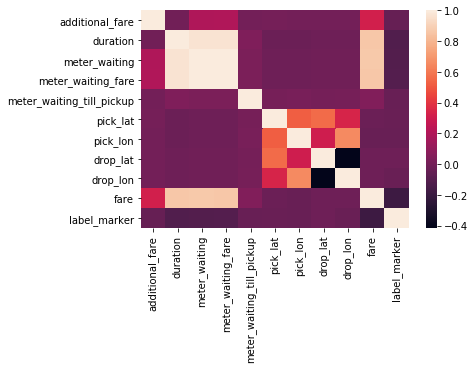

In [11]:
sns.heatmap(heatmap_initial)

<b>Box Plots</b>

In [12]:
sns.set_style("whitegrid")

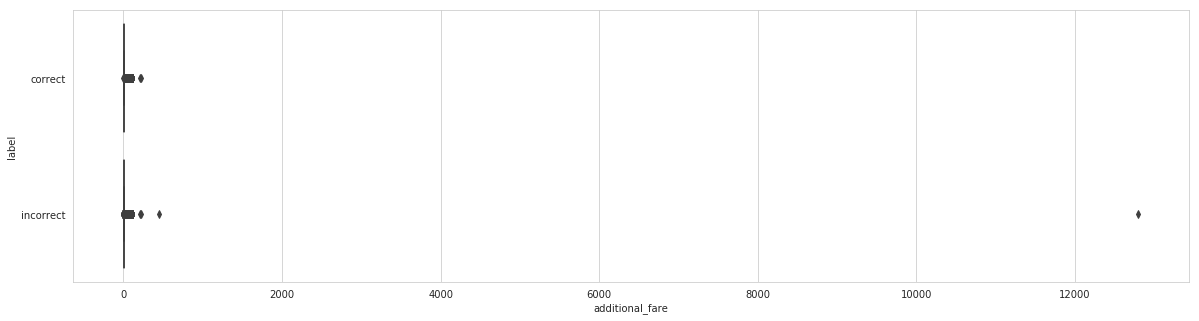

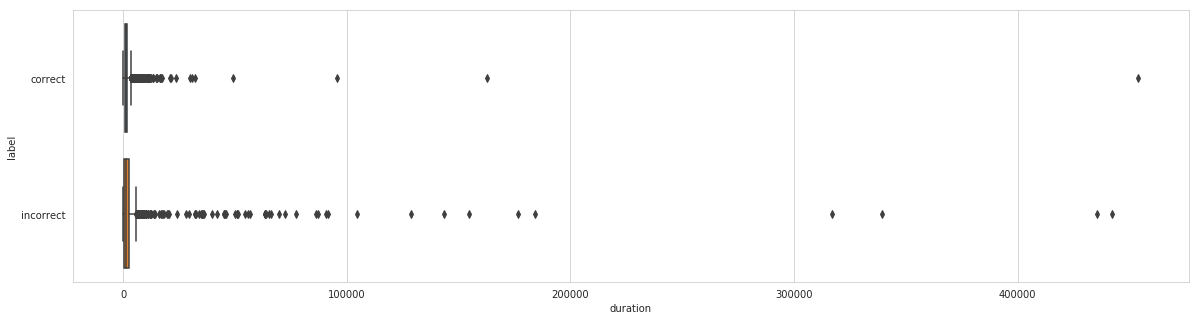

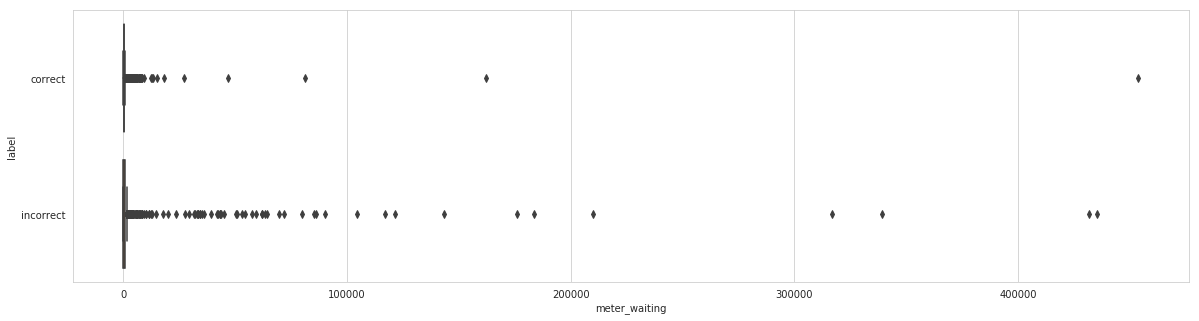

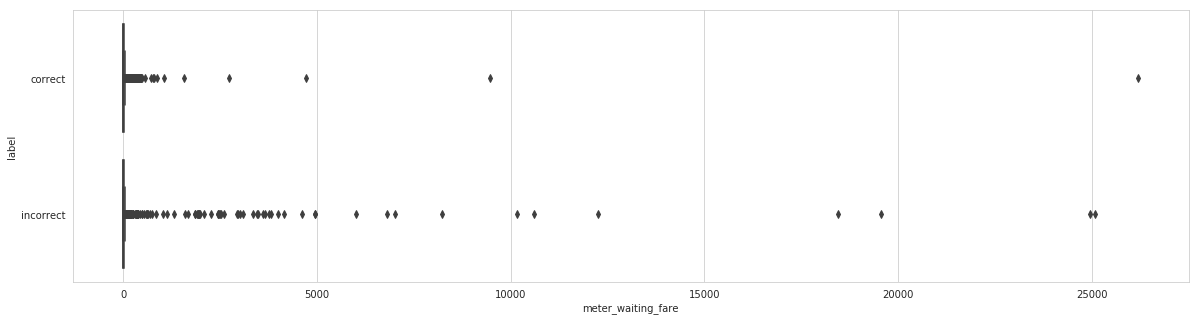

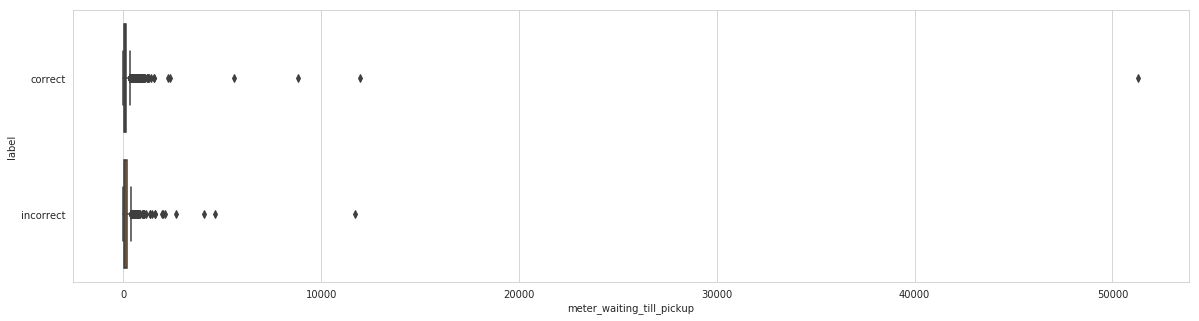

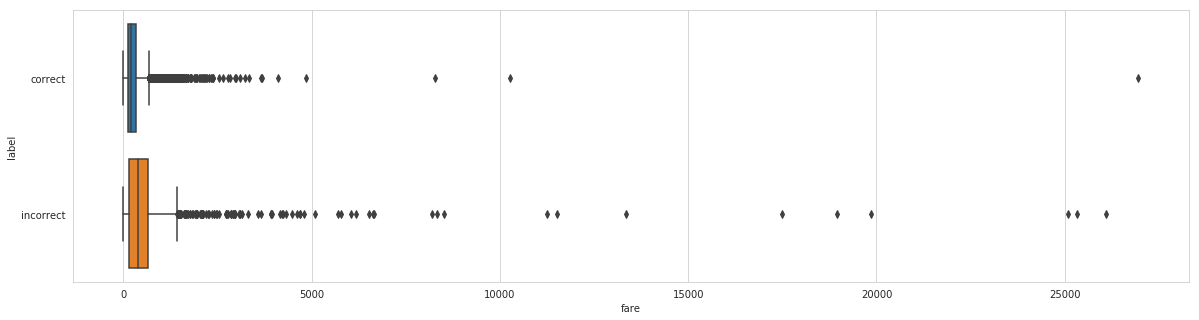

In [13]:
for i in ['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup', 'fare'] :
    plt.figure(figsize=(20,5))
    sns.boxplot(x = i, y = 'label', data = training_df) 
    plt.show()

<b>Two feature comparisions</b>

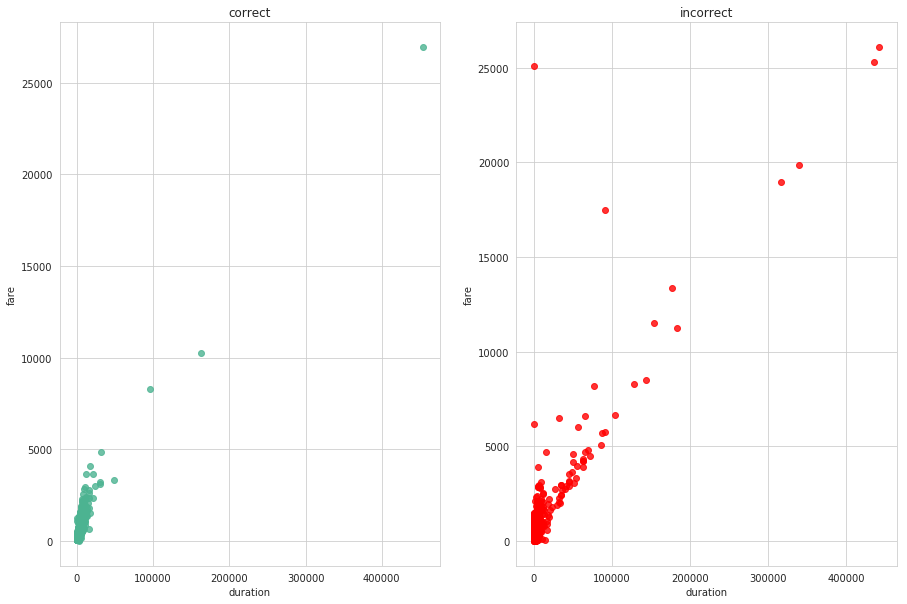

In [14]:
figure, axes = plt.subplots(1, 2, figsize=(15,10))
index = 0
colors = ["#4CB391", "#FF0000"]
for i in ['correct', 'incorrect'] :
    sns.regplot('duration', 'fare', training_df[training_df['label']==i], fit_reg=False, ax=axes[index], color=colors[index])
    axes[index].set_title(i)
    index = index + 1
plt.show()

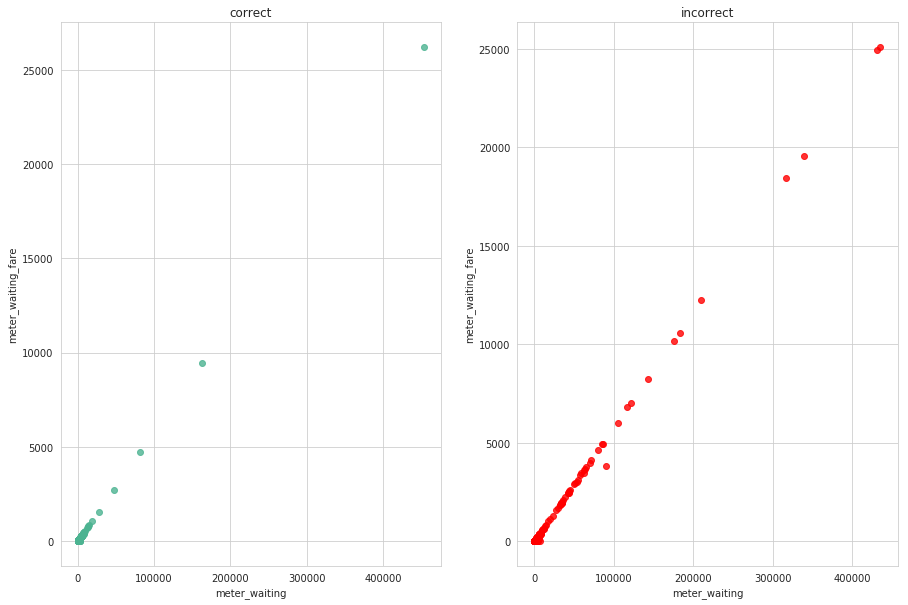

In [15]:
figure, axes = plt.subplots(1, 2, figsize=(15,10))
index = 0
colors = ["#4CB391", "#FF0000"]
for i in ['correct', 'incorrect'] :
    sns.regplot('meter_waiting', 'meter_waiting_fare', training_df[training_df['label']==i], fit_reg=False, ax=axes[index], color=colors[index])
    axes[index].set_title(i)
    index = index + 1
plt.show()

<h2>Identification of Anomalies within the Correct dataset</h2>
<b>Consider only correct as Anomalies within the correct data maybe called 'incorrect' due to the anomaly<b>

In [16]:
training_df.isna().sum()

additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
label_marker                   0
dtype: int64

In [17]:
correct_training_df = training_df[training_df['label']=='correct']

<h3>Null and Zero variable Analysis</h3>

In [18]:
correct_training_df.isna().sum()

additional_fare              53
duration                     53
meter_waiting                53
meter_waiting_fare           53
meter_waiting_till_pickup    53
pickup_time                   0
drop_time                     0
pick_lat                      0
pick_lon                      0
drop_lat                      0
drop_lon                      0
fare                          0
label                         0
label_marker                  0
dtype: int64

<b>All Rows with unspecified fare are incorrect<b>

In [19]:
corrNaNRows = correct_training_df[correct_training_df.isnull().any(axis=1)]

<b>All NaN entries are on the same row and are not dispersed<b>

In [20]:
zero_count = {}
negative_count = {}
for i in ['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare',
       'meter_waiting_till_pickup', 'fare'] :
    zero_count[i] = 0
    negative_count[i] = 0
    for index,row in correct_training_df.iterrows():
        if row[i] < 0:
            negative_count[i]+=1
        if row[i] == 0:
            zero_count[i]+=1

In [21]:
print(zero_count)
print(negative_count)

{'additional_fare': 1, 'duration': 0, 'meter_waiting': 636, 'meter_waiting_fare': 7568, 'meter_waiting_till_pickup': 1319, 'fare': 1}
{'additional_fare': 0, 'duration': 0, 'meter_waiting': 0, 'meter_waiting_fare': 0, 'meter_waiting_till_pickup': 0, 'fare': 0}


<b>No negative counts<b>

In [22]:
correct_training_df[correct_training_df['fare']==0]

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,label_marker
tripid,,,,,,,,,,,,,,
191841099,0.0,2446.0,840.0,0.0,231.0,2019-11-14 08:25:00,2019-11-14 09:06:00,6.85527,79.8882,6.87782,79.8773,0.0,correct,1


<b>All rows with fare = 0 [except 191841099] are marked incorrect <b> <br/>
<b>All rows with fare = 0 also have 0 additional fare and meter waiting fare<b> <br/>
<b>Row could be an anomaly<b>

<h1>Feature Engineering</h1>

In [23]:
# Bin times into 3 ranges to simplify time ascpect
training_df = training_df.assign(timeOfDay=pd.cut(training_df.pickup_time.dt.hour,[-1, 8, 20, 24],labels=['dawn','day', 'night']))

training_df['isDawn']=(training_df['timeOfDay']=='dawn').astype(int)
training_df['isNight']=(training_df['timeOfDay']=='night').astype(int)
training_df['isDay']=(training_df['timeOfDay']=='day').astype(int)

In [24]:
durations = []
for index,row in training_df.iterrows():
    provided_duration = row['duration'] 
    if math.isnan(provided_duration) or provided_duration <= 0 :
        time_dif = (row['drop_time'] - row['pickup_time']).seconds
        if time_dif == 0:
            time_dif = np.nan
        durations.append(time_dif)
    else :  
        durations.append(provided_duration)

training_df.insert(10,"time_dif",durations)

In [25]:
def dist_from_coordinates(lat1, lon1, lat2, lon2):
    R = 6371  
    d_lat = np.radians(lat2-lat1)
    d_lon = np.radians(lon2-lon1)

    r_lat1 = np.radians(lat1)
    r_lat2 = np.radians(lat2)
    a = np.sin(d_lat/2.) **2 + np.cos(r_lat1) * np.cos(r_lat2) * np.sin(d_lon/2.)**2

    haversine = 2 * R * np.arcsin(np.sqrt(a))

    return haversine

In [26]:
distances = []                    #empty column for distance
for index,row in training_df.iterrows():
    lat1 = row['pick_lat'] 
    lon1 = row['pick_lon'] 
    lat2 = row['drop_lat'] 
    lon2 = row['drop_lon'] 
    value = dist_from_coordinates(lat1, lon1, lat2, lon2)  
    distances.append(value)   

training_df.insert(10,"distance",distances)

In [27]:
training_df['time_driven'] = training_df['duration']  - training_df['meter_waiting']

In [28]:
training_df['driving_fare'] = training_df['fare']  - training_df['meter_waiting_fare'] - training_df['additional_fare']

In [29]:
costsperkm = []
for index,row in training_df.iterrows():
    if row['distance'] == 0:
        costperkm = np.nan
            
    else:
        costperkm = (row['driving_fare'] / row['distance'])
    costsperkm.append(costperkm)

training_df.insert(4,"cost_per_km",costsperkm)

In [30]:
avgspeeds = []
for index,row in training_df.iterrows():
    if(row['time_driven'] == 0):
        avgspeed = np.nan
    else:
        avgspeed = (row['distance'] / row['time_driven'] * 3600)
    avgspeeds.append(avgspeed)

training_df.insert(4,"avg_speed",avgspeeds)



In [31]:
chargeperhours = []
for index,row in training_df.iterrows():
    if(row['meter_waiting'] == 0):
        chargeperhour = np.nan
    else:
        chargeperhour = (row['meter_waiting_fare'] / row['meter_waiting'] * 3600)
    chargeperhours.append(chargeperhour)

training_df.insert(4,'charge_per_hour',chargeperhours)


In [32]:
training_df.loc[training_df['timeOfDay'] == 'day', 'isNormalCharge'] = 1
training_df.loc[training_df['timeOfDay'] != 'day', 'isNormalCharge'] = 0

In [64]:
training_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,charge_per_hour,avg_speed,cost_per_km,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,distance,time_dif,drop_lon,fare,label,label_marker,timeOfDay,isDawn,isNight,isDay,time_driven,driving_fare,isNormalCharge
tripid,,,,,,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.000000,0.000000,23.565516,51.017424,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,5.092770,834.0,79.8783,270.32,correct,1,dawn,1,0,0,778.0,259.820000,0.0
189125358,10.5,791.0,47.0,0.000000,0.000000,15.329311,59.137183,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,3.168058,791.0,79.8923,197.85,correct,1,dawn,1,0,0,744.0,187.350000,0.0
189125719,10.5,1087.0,80.0,0.000000,0.000000,22.541631,46.173157,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,6.305395,1087.0,79.9146,301.64,correct,1,dawn,1,0,0,1007.0,291.140000,0.0
189127273,10.5,598.0,271.0,15.663800,208.080000,9.489315,65.127273,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,0.861946,598.0,79.8971,82.30,correct,1,dawn,1,0,0,327.0,56.136200,0.0
189128020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,8.147782,1020.0,79.9290,358.39,correct,1,dawn,1,0,0,NaN,NaN,0.0
189129552,10.5,3407.0,182.0,0.000000,0.000000,27.021811,43.562535,112.0,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,24.207039,3407.0,79.8649,1065.02,correct,1,dawn,1,0,0,3225.0,1054.520000,0.0
189132829,10.5,1246.0,487.0,0.000000,0.000000,22.660665,53.608242,133.0,2019-11-01 06:29:00,2019-11-01 06:49:00,6.84371,79.9051,6.85069,4.777624,1246.0,79.8624,266.62,correct,1,dawn,1,0,0,759.0,256.120000,0.0
189135103,10.5,1333.0,295.0,17.198500,209.880000,18.459689,54.551267,212.0,2019-11-01 06:50:00,2019-11-01 07:12:00,6.90760,79.9524,6.90634,5.322544,1333.0,79.9042,318.05,correct,1,dawn,1,0,0,1038.0,290.351500,0.0
189139296,10.5,360.0,80.0,4.664000,209.880000,13.311024,82.252341,3.0,2019-11-01 07:00:00,2019-11-01 07:06:00,7.26706,80.6064,7.27422,1.035302,360.0,80.6124,100.32,correct,1,dawn,1,0,0,280.0,85.156000,0.0


<h1>Post feature engineering Analysis</h1>

In [33]:
training_df.columns[training_df.dtypes == "float64"].values

array(['additional_fare', 'duration', 'meter_waiting',
       'meter_waiting_fare', 'charge_per_hour', 'avg_speed',
       'cost_per_km', 'meter_waiting_till_pickup', 'pick_lat', 'pick_lon',
       'drop_lat', 'distance', 'time_dif', 'drop_lon', 'fare',
       'time_driven', 'driving_fare', 'isNormalCharge'], dtype=object)

In [34]:
numerical_features = [ 'duration', 'meter_waiting',
       'meter_waiting_fare', 'charge_per_hour', 'avg_speed',
       'cost_per_km', 'meter_waiting_till_pickup', 'distance', 'time_dif', 'fare',
       'time_driven', 'driving_fare']
numerical_features_with_label = ['duration', 'meter_waiting',
       'meter_waiting_fare', 'charge_per_hour', 'avg_speed',
       'cost_per_km', 'meter_waiting_till_pickup', 'distance', 'time_dif', 'fare',
       'time_driven', 'driving_fare','label']

In [35]:
training_features = training_df[numerical_features]

In [36]:
training_features_with_labels = training_df[numerical_features_with_label]

<h2>IQR Anaylsis</h2>

<b>General Anaylsis of entire dataset</b>

In [37]:
train_features = training_df[numerical_features]

In [38]:
Q1 = train_features.quantile(0.25)
Q3 = train_features.quantile(0.75)
IQR = Q3-Q1
print(IQR)

duration                     1255.000000
meter_waiting                 318.000000
meter_waiting_fare             14.341800
charge_per_hour               208.484825
avg_speed                       8.232176
cost_per_km                    29.728748
meter_waiting_till_pickup     118.000000
distance                        4.674884
time_dif                     1260.000000
fare                          240.950000
time_driven                   955.750000
driving_fare                  224.043750
dtype: float64


In [39]:
print ( (train_features < (Q1 - 3 * IQR)) | (train_features > (Q3 + 3 * IQR)) )

           duration  meter_waiting  meter_waiting_fare  charge_per_hour  \
tripid                                                                    
189123628     False          False               False            False   
189125358     False          False               False            False   
189125719     False          False               False            False   
189127273     False          False               False            False   
189128020     False          False               False            False   
189129552     False          False               False            False   
189132829     False          False               False            False   
189135103     False          False               False            False   
189139296     False          False               False            False   
189138671     False          False               False            False   
189135814     False          False               False            False   
189140969     False      

In [40]:
training_df_out =  train_features[ ~((train_features < (Q1 - 3 * IQR)) | (train_features > (Q3 + 3 * IQR))).any(axis=1) ]

In [41]:
training_df_out.shape

(13777, 12)

<b>Outlier from analyzing inccorrect cases</b>

In [42]:
incorrect_training_df = training_features_with_labels[training_features_with_labels['label']=='incorrect']

In [43]:
Q1_incorr = incorrect_training_df[numerical_features].quantile(0.25)
Q3_incorr = incorrect_training_df[numerical_features].quantile(0.75)
IQR_incorr = Q3_incorr-Q1_incorr
print(IQR_incorr)

duration                     2044.750000
meter_waiting                 556.500000
meter_waiting_fare             17.466575
charge_per_hour               208.080000
avg_speed                      15.973111
cost_per_km                   227.277144
meter_waiting_till_pickup     141.000000
distance                        5.776317
time_dif                     2047.000000
fare                          516.695000
time_driven                  1388.250000
driving_fare                  481.869600
dtype: float64


In [44]:
incorrect_train_features = incorrect_training_df[numerical_features]

In [45]:
print ( (incorrect_train_features < (Q1_incorr - 3 * IQR_incorr)) | (incorrect_train_features > (Q3_incorr + 3 * IQR_incorr)) )

           duration  meter_waiting  meter_waiting_fare  charge_per_hour  \
tripid                                                                    
189135814     False          False               False            False   
189140969     False          False               False            False   
189147041     False          False               False            False   
189157607     False          False                True            False   
189160756     False          False               False            False   
189161377     False          False               False            False   
189164806     False           True                True            False   
189164831     False          False               False            False   
189164791     False          False               False            False   
189174640     False          False               False            False   
189177562     False          False               False            False   
189191865     False      

In [46]:
incorrect_training_df_out =  incorrect_train_features[ ~((incorrect_train_features < (Q1_incorr - 3 * IQR_incorr)) | (incorrect_train_features > (Q3_incorr + 3 * IQR_incorr))).any(axis=1) ]

In [47]:
incorrect_training_df_out.shape

(1090, 12)

<b>Outlier from analyzing correct cases</b>

In [48]:
correct_training_df = training_features_with_labels[training_features_with_labels['label']=='correct']

In [49]:
Q1_corr = correct_training_df[numerical_features].quantile(0.25)
Q3_corr = correct_training_df[numerical_features].quantile(0.75)
IQR_corr = Q3_corr-Q1_corr
print(IQR_corr)

duration                     1201.000000
meter_waiting                 306.750000
meter_waiting_fare             14.089896
charge_per_hour               208.696086
avg_speed                       7.821573
cost_per_km                    24.730741
meter_waiting_till_pickup     116.000000
distance                        4.566921
time_dif                     1202.000000
fare                          216.790000
time_driven                   927.000000
driving_fare                  202.767500
dtype: float64


In [50]:
correct_train_features = correct_training_df[numerical_features]

In [51]:
correct_train_features.shape

(15495, 12)

In [52]:
correct_training_df_out =  correct_train_features[ ~((correct_train_features < (Q1_corr - 3 * IQR_corr)) | (correct_train_features > (Q3_corr + 3 * IQR_corr))).any(axis=1) ]

In [53]:
diff_index = correct_train_features.index.difference(correct_training_df_out.index)

In [54]:
print(diff_index.tolist())

[189129552, 189146174, 189176766, 189190774, 189192436, 189211199, 189213407, 189227008, 189228044, 189230575, 189236485, 189245392, 189248046, 189251999, 189254149, 189258007, 189259043, 189277797, 189284005, 189308768, 189323004, 189326852, 189335987, 189358090, 189363308, 189364148, 189370252, 189372631, 189372731, 189373423, 189378522, 189390463, 189391652, 189391717, 189394373, 189402781, 189406485, 189415426, 189416745, 189419091, 189420181, 189428397, 189445521, 189466384, 189497967, 189551186, 189559733, 189572039, 189582749, 189592642, 189619335, 189627696, 189629516, 189635649, 189639329, 189640410, 189658667, 189667686, 189671196, 189673367, 189679466, 189685055, 189698072, 189704023, 189737409, 189747601, 189748039, 189757049, 189767527, 189778822, 189800308, 189801272, 189818513, 189820090, 189820422, 189821179, 189824507, 189824910, 189826263, 189829043, 189831314, 189835514, 189842817, 189864368, 189877805, 189877959, 189879609, 189882220, 189882564, 189882959, 189884798

In [55]:
correct_training_df_out.shape

(12885, 12)

<h2>Graph anaylsis</h2>

<b>Box plot analysis</b>

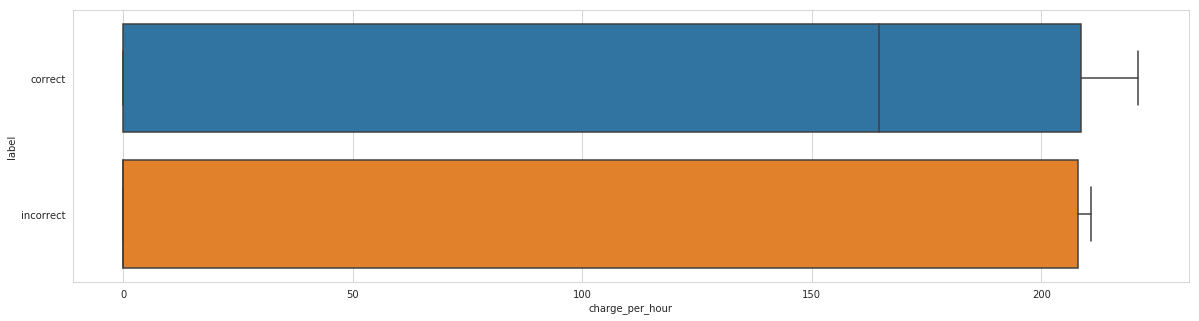

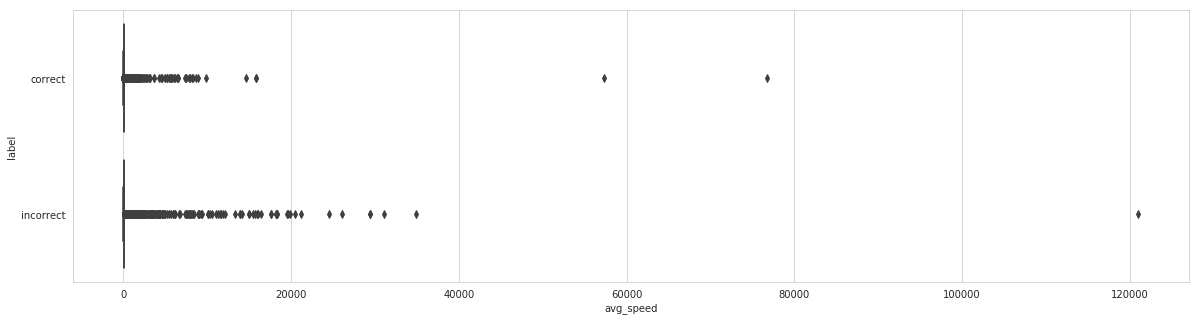

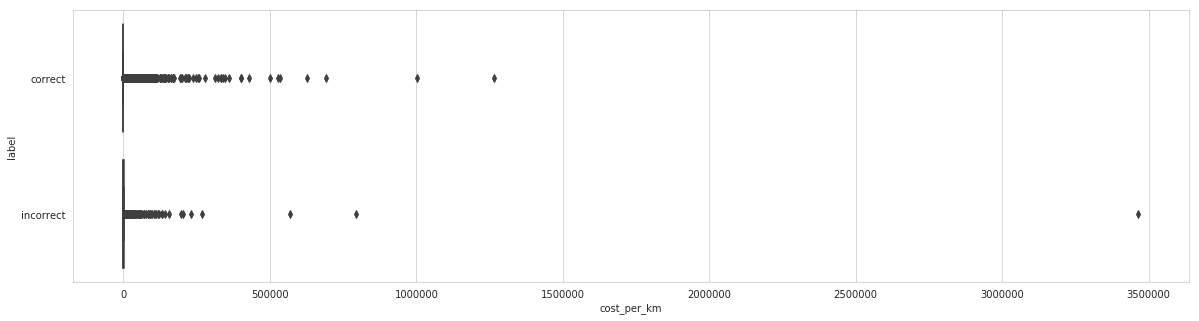

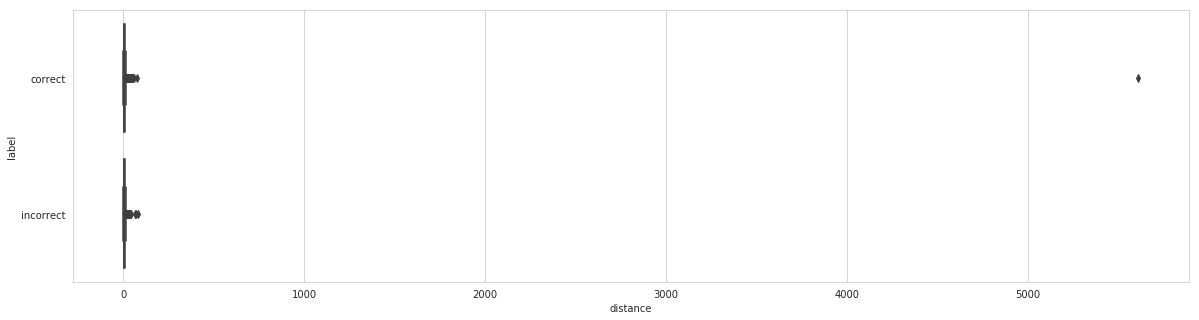

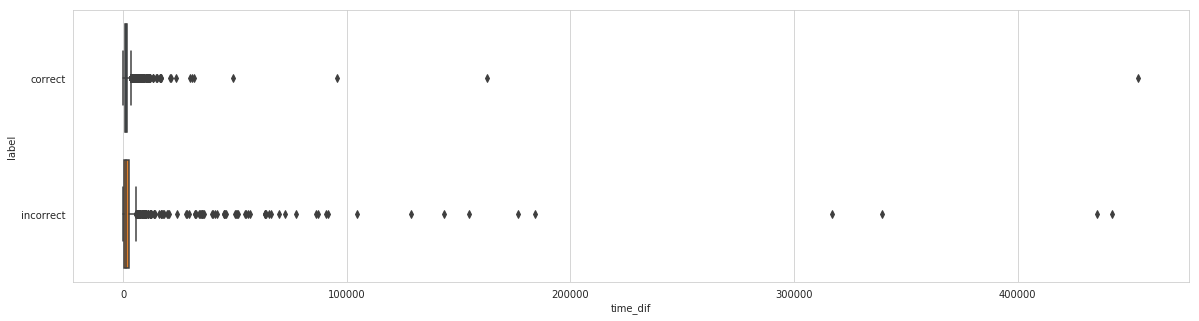

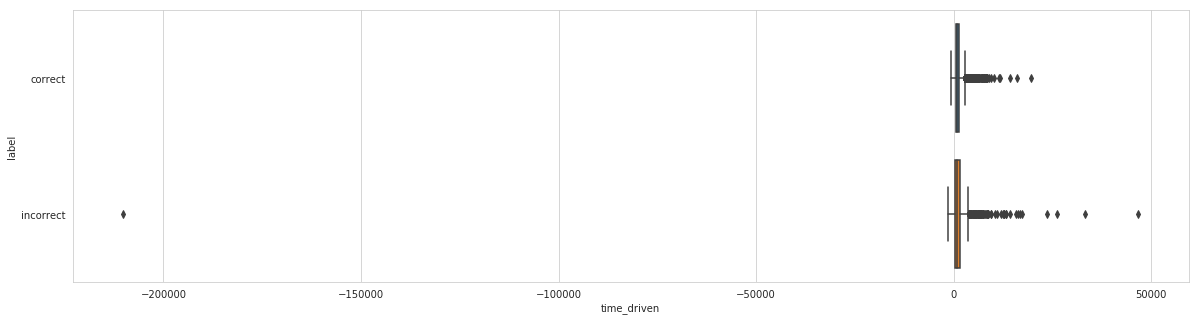

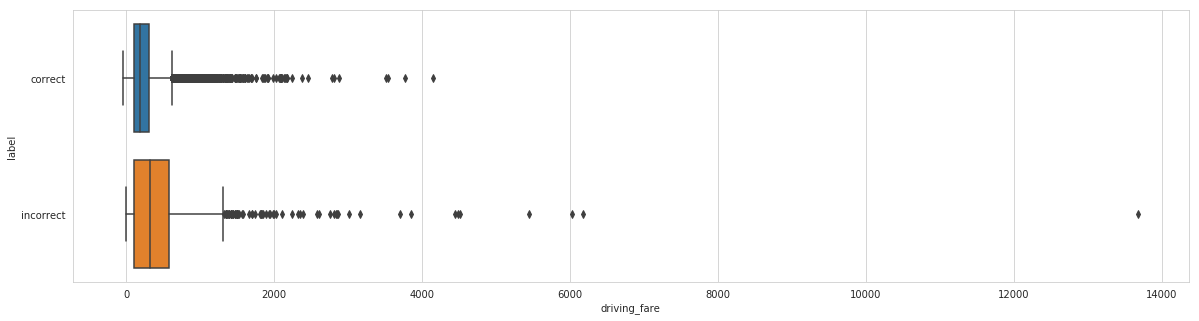

In [56]:
for i in ['charge_per_hour', 'avg_speed','cost_per_km', 'distance', 'time_dif','time_driven', 'driving_fare'] :
    plt.figure(figsize=(20,5))
    sns.boxplot(x = i, y = 'label', data = training_df) 
    plt.show()

<b>Two feature analysis</b>

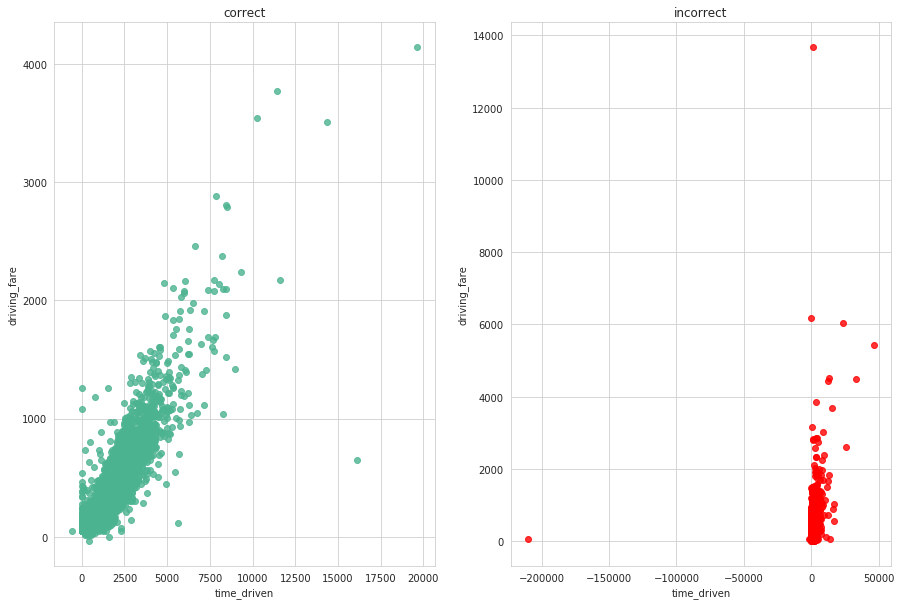

In [57]:
figure, axes = plt.subplots(1, 2, figsize=(15,10))
index = 0
colors = ["#4CB391", "#FF0000"]
for i in ['correct', 'incorrect'] :
    sns.regplot('time_driven', 'driving_fare', training_df[training_df['label']==i], fit_reg=False, ax=axes[index], color=colors[index])
    axes[index].set_title(i)
    index = index + 1
plt.show()

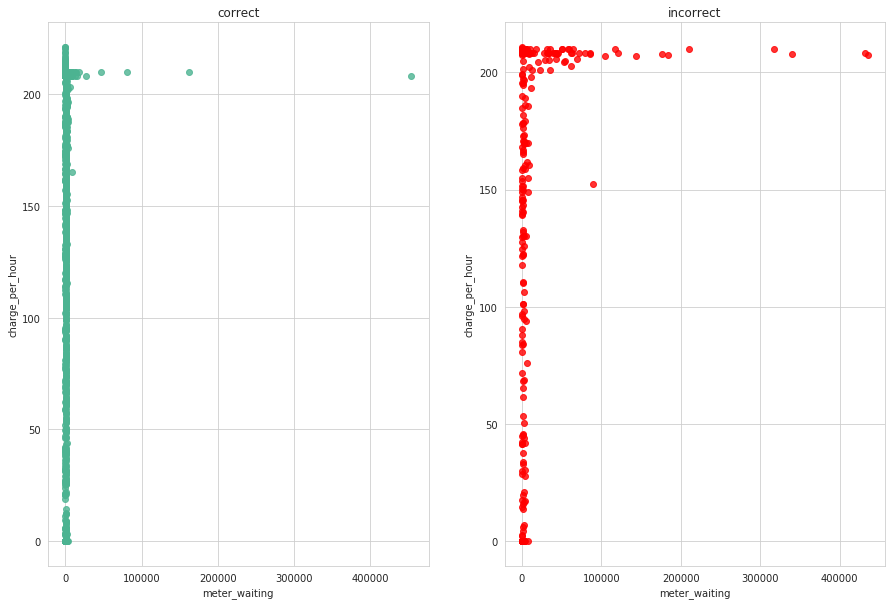

In [61]:
figure, axes = plt.subplots(1, 2, figsize=(15,10))
index = 0
colors = ["#4CB391", "#FF0000"]
for i in ['correct', 'incorrect'] :
    sns.regplot('meter_waiting', 'charge_per_hour', training_df[training_df['label']==i], fit_reg=False, ax=axes[index], color=colors[index])
    axes[index].set_title(i)
    index = index + 1
plt.show()

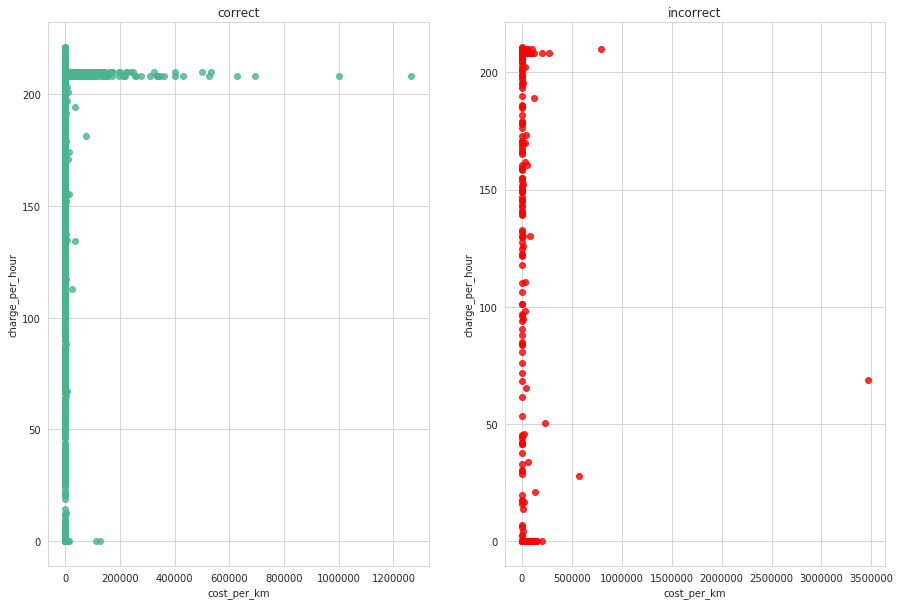

In [67]:
figure, axes = plt.subplots(1, 2, figsize=(15,10))
index = 0
colors = ["#4CB391", "#FF0000"]
for i in ['correct', 'incorrect'] :
    sns.regplot('cost_per_km', 'charge_per_hour', training_df[training_df['label']==i], fit_reg=False, ax=axes[index], color=colors[index])
    axes[index].set_title(i)
    index = index + 1
plt.show()

<b>Heat map analysis<b>

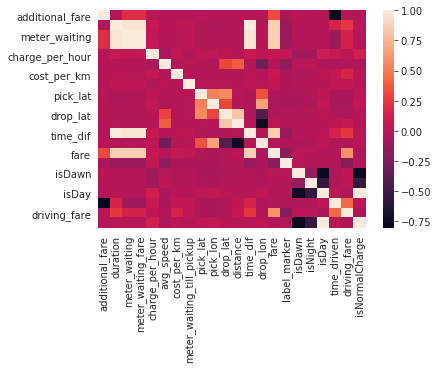

In [59]:
sns.heatmap(training_df.corr())

In [ ]:
zero_count = {}
negative_count = {}
for i in ['avg_speed','driving_fare','time_driven','distance'] :
    zero_count[i] = 0
    negative_count[i] = 0
    for index,row in training_df.iterrows():
        if row[i] < 0:
            negative_count[i]+=1
        if row[i] == 0:
            zero_count[i]+=1

In [ ]:
print(zero_count)
print(negative_count)

<h3>Viewing features of the Incorrect Dataset</h3>

In [ ]:
incorrect_training_df = training_df[training_df['label']=='incorrect']

In [ ]:
incorrect_training_df[incorrect_training_df['meter_waiting'] < 3600].plot(kind='scatter',x='meter_waiting',y='charge_per_hour',color='red')

<h2>Identification of Anomalies within the Correct dataset</h2>
<b>Consider only correct as Anomalies within the correct data maybe called 'incorrect' due to the anomaly<b>

In [ ]:
correct_training_df = training_df[training_df['label']=='correct']

In [ ]:
correct_training_df.nlargest(10, ['cost_per_km'])

In [ ]:
correct_training_df.plot(kind='scatter',y='cost_per_km',x='distance')

In [ ]:
zero_count = {}
negative_count = {}
for i in ['avg_speed','driving_fare','time_driven','distance', 'charge_per_hour'] :
    zero_count[i] = 0
    negative_count[i] = 0
    for index,row in correct_training_df.iterrows():
        if row[i] < 0:
            negative_count[i]+=1
        if row[i] == 0:
            zero_count[i]+=1

In [ ]:
print(zero_count)
print(negative_count)

In [ ]:
correct_training_df[correct_training_df['avg_speed'] < 0] 

<b>row 207947602 is anomolous as the driving time is negative<b>

In [ ]:
correct_training_df[correct_training_df['time_driven'] == 0] 

In [ ]:
correct_training_df[correct_training_df['time_driven'] < 60]